In [2]:
# STEP 1:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ha_data_assessement.csv')

In [4]:
df[0:31]

,city,category,country_code,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
0,Trento,Shared Room,it,2016-03-12 12:31:31,190.00,"""yes""",NaN,NaN,"""no""","""yes""","""no""","""no""","""no"""
1,Milan,Apartment,it,2019-11-14 14:48:10,3200.00,"""yes""","""50""","""yes""","""yes""","""yes""",NaN,"""no""",NaN
2,Milan,Shared Room,it,2019-10-07 10:08:21,660.00,"""yes""","""180""",NaN,"""yes""",NaN,NaN,NaN,NaN
3,Pisa,Shared Room,it,2017-07-05 11:41:57,245.00,"""yes""","""140""","""no""","""yes""","""no""",NaN,"""no""",NaN
4,Bologna,Private Room,it,2017-11-16 08:55:46,500.00,"""yes""","""18""",NaN,"""yes""","""no""",NaN,NaN,NaN
5,Pisa,Studio,it,2017-05-06 14:30:36,367.00,"""yes""",NaN,NaN,"""yes""","""no""",NaN,"""shared""",NaN
6,Milan,Private Room,it,2017-09-19 16:40:33,700.00,NaN,NaN,NaN,"""yes""",NaN,NaN,"""no""",NaN
7,Bologna,Private Room,it,2018-06-13 11:48:58,214.00,"""yes""",NaN,"""no""","""yes""","""no""",NaN,"""shared""",NaN
8,Pisa,Private Room,it,2017-01-01 23:42:09,250.00,"""yes""",NaN,"""yes""","""yes""","""yes""",NaN,"""no""",NaN
9,Pisa,Private Room,it,2019-02-09 18:36:21,360.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

# STEP 2: Check unique values and their counts in the bool columns


# Columns with "yes"/"no" values stored as strings
bool_cols = [
    'furnished',
    'registration_possible',
    'washing_machine',
    'tv',
    'balcony',
    'garden',
    'terrace',
    'city'
]

# Display unique values and their counts for each bool column
for col in bool_cols:
    print(f"\nUnique values in '{col}' column and their counts:")
    print(df[col].value_counts())



Unique values in 'furnished' column and their counts:
furnished
"yes"    5155
"no"      886
""        762
Name: count, dtype: int64

Unique values in 'registration_possible' column and their counts:
registration_possible
"yes"    3649
"no"      729
""        599
Name: count, dtype: int64

Unique values in 'washing_machine' column and their counts:
washing_machine
"yes"    7361
"no"      397
""        171
Name: count, dtype: int64

Unique values in 'tv' column and their counts:
tv
"yes"    4455
"no"     2160
""        416
Name: count, dtype: int64

Unique values in 'balcony' column and their counts:
balcony
""           749
"shared"     520
"no"         503
"private"    365
Name: count, dtype: int64

Unique values in 'garden' column and their counts:
garden
"no"         4459
"shared"     1302
""            766
"private"     202
Name: count, dtype: int64

Unique values in 'terrace' column and their counts:
terrace
""           853
"no"         771
"shared"     358
"private"    104
Name:

**Cleaning formatting**

In [7]:

# 1. Clean formatting: remove quotes, trim whitespace and replace empty strings with NaN

for col in bool_cols:

    # Remove quotes and trim spaces
    df[col] = df[col].astype(str).str.replace('"', '').str.strip()

    # Replace empty strings with NaN
    df[col] = df[col].replace({'': np.nan, 'nan': np.nan})



# 2. Remove the quotes from the numeric values:

df['total_size'] = df['total_size'].astype(str).str.replace('"', '').str.strip()

# Print the first few rows of the dataset to see the changes after cleaning
print("\nFirst 5 rows after cleaning all columns:")
print(df.head())



First 5 rows after cleaning all columns:
      city      category country_code           created_at   price furnished  \
0   Trento   Shared Room           it  2016-03-12 12:31:31   190.0       yes   
1    Milan     Apartment           it  2019-11-14 14:48:10  3200.0       yes   
2    Milan   Shared Room           it  2019-10-07 10:08:21   660.0       yes   
3     Pisa   Shared Room           it  2017-07-05 11:41:57   245.0       yes   
4  Bologna  Private Room           it  2017-11-16 08:55:46   500.0       yes   

  total_size registration_possible washing_machine   tv balcony garden terrace  
0        nan                   NaN              no  yes      no     no      no  
1         50                   yes             yes  yes     NaN     no     NaN  
2        180                   NaN             yes  NaN     NaN    NaN     NaN  
3        140                    no             yes   no     NaN     no     NaN  
4         18                   NaN             yes   no     NaN    NaN  

**Defining Data Types**

In [9]:

# 1. Convert 'total_size' to numeric values:

df['total_size'] = pd.to_numeric(df['total_size'], errors='coerce') # skipping non numeric values of the data that cause errors (2 values) e.g. "100 over  + 35 down"


In [10]:
# 2. Convert text columns to string types for efficient storage/processing
string_columns = [
    "city", "category", "country_code", "furnished",
    "registration_possible", "washing_machine", "tv", "balcony",
    "garden", "terrace"
]

# Convert selected columns to string dtype
df[string_columns] = df[string_columns].astype("string")

# Convert 'created_at' to datetime
df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")



**Missing values**

In [11]:
# Drop rows with missing values in columns necessary for analysis(essential columns):

df = df.dropna(subset=['price', 'city'])

# 5. Replace NAs with 'Unknown' for better graphical representation on the remaining columns:
df[string_columns] = df[string_columns].fillna("Unknown")

print("New shape after dropping rows with missing 'price', 'city', or 'category':", df.shape)
print(df.head())


New shape after dropping rows with missing 'price', 'city', or 'category': (9404, 13)
      city      category country_code          created_at   price furnished  \
0   Trento   Shared Room           it 2016-03-12 12:31:31   190.0       yes   
1    Milan     Apartment           it 2019-11-14 14:48:10  3200.0       yes   
2    Milan   Shared Room           it 2019-10-07 10:08:21   660.0       yes   
3     Pisa   Shared Room           it 2017-07-05 11:41:57   245.0       yes   
4  Bologna  Private Room           it 2017-11-16 08:55:46   500.0       yes   

   total_size registration_possible washing_machine       tv  balcony  \
0         NaN               Unknown              no      yes       no   
1        50.0                   yes             yes      yes  Unknown   
2       180.0               Unknown             yes  Unknown  Unknown   
3       140.0                    no             yes       no  Unknown   
4        18.0               Unknown             yes       no  Unknown   



<ipython-input-11-a7e758998ab3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[string_columns] = df[string_columns].fillna("Unknown")


In [12]:

# Display basic info about the dataset
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display data types
print("\nData types for each column:")
print(df.dtypes)

# Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())

# Unique values in key columns
print("\nUnique values in 'category':", df['category'].unique())
print("Unique values in 'furnished':", df['furnished'].unique())

# Count of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

Shape of dataset: (9404, 13)

First 5 rows of the dataset:
      city      category country_code          created_at   price furnished  \
0   Trento   Shared Room           it 2016-03-12 12:31:31   190.0       yes   
1    Milan     Apartment           it 2019-11-14 14:48:10  3200.0       yes   
2    Milan   Shared Room           it 2019-10-07 10:08:21   660.0       yes   
3     Pisa   Shared Room           it 2017-07-05 11:41:57   245.0       yes   
4  Bologna  Private Room           it 2017-11-16 08:55:46   500.0       yes   

   total_size registration_possible washing_machine       tv  balcony  \
0         NaN               Unknown              no      yes       no   
1        50.0                   yes             yes      yes  Unknown   
2       180.0               Unknown             yes  Unknown  Unknown   
3       140.0                    no             yes       no  Unknown   
4        18.0               Unknown             yes       no  Unknown   

    garden  terrace  
0    

In [ ]:
df

,city,category,country_code,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
0,Trento,Shared Room,it,2016-03-12 12:31:31,190.0,yes,NaN,Unknown,no,yes,no,no,no
1,Milan,Apartment,it,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,Unknown,no,Unknown
2,Milan,Shared Room,it,2019-10-07 10:08:21,660.0,yes,180.0,Unknown,yes,Unknown,Unknown,Unknown,Unknown
3,Pisa,Shared Room,it,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,Unknown,no,Unknown
4,Bologna,Private Room,it,2017-11-16 08:55:46,500.0,yes,18.0,Unknown,yes,no,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Florence,Private Room,it,2016-07-05 14:35:08,300.0,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
9996,Bologna,Private Room,it,2016-05-31 15:25:42,380.0,Unknown,NaN,Unknown,yes,Unknown,shared,Unknown,Unknown
9997,Milan,Private Room,it,2017-03-21 12:37:46,560.0,Unknown,130.0,yes,yes,Unknown,Unknown,no,Unknown
9998,Catania,Private Room,it,2016-04-29 20:09:30,215.0,yes,NaN,Unknown,yes,no,no,no,shared


In [13]:
#Removing outliers based on extreme low and high values - Price:

filtered_df = df[(df['price'] >= 50) & (df['price'] <= 10000)]

#Removing outliers based on extreme low and high values - Total Size:

filtered_df = df[(df['total_size'] > 3) & (df['total_size'] < 3000)]

filtered_df


,city,category,country_code,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
1,Milan,Apartment,it,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,Unknown,no,Unknown
2,Milan,Shared Room,it,2019-10-07 10:08:21,660.0,yes,180.0,Unknown,yes,Unknown,Unknown,Unknown,Unknown
3,Pisa,Shared Room,it,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,Unknown,no,Unknown
4,Bologna,Private Room,it,2017-11-16 08:55:46,500.0,yes,18.0,Unknown,yes,no,Unknown,Unknown,Unknown
10,Milan,Apartment,it,2018-11-21 16:15:56,6000.0,yes,180.0,yes,yes,yes,Unknown,private,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Florence,Private Room,it,2018-06-28 20:22:40,460.0,yes,160.0,yes,yes,yes,Unknown,no,Unknown
9983,Turin,Apartment,it,2018-02-20 11:19:20,800.0,yes,107.0,yes,yes,yes,Unknown,shared,Unknown
9990,Turin,Private Room,it,2016-04-24 20:51:41,350.0,yes,45.0,no,no,yes,shared,shared,no
9993,Milan,Shared Room,it,2017-02-23 20:23:11,525.0,yes,150.0,Unknown,yes,yes,Unknown,no,Unknown


In [ ]:
## Alternative Approach Using InterQuartile Range:

# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Calculate lower and upper bounds for detecting outliers:

# outlier_lower_bound = Q1 - 1.5 * IQR
# outlier_upper_bound = Q3 + 1.5 * IQR

# # Remove outliers, prices outside the IQR range:

# df_cleaned = df[(df['price'] >= outlier_lower_bound) & (df['price'] <= outlier_upper_bound)]

# # Check how many rows remain after removing outliers
# print("Shape after removing outliers:", df_cleaned.shape)

Shape after removing outliers: (8158, 13)


In [27]:
# Save the cleaned dataset to a new CSV file:

filtered_df.to_csv('/content/drive/MyDrive/cleaned_housing_anywhere.csv', index=False)

# Check if the data is saved:

print("Data saved successfully!")



Data saved successfully!


# Rolling average of median monthly rental price development over time

**Create a virtual database to run the queries**



In [28]:
import sqlite3

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/cleaned_housing_anywhere.csv")

# Connect to SQLite
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load into SQLite table
df.to_sql("listings", conn, if_exists="replace", index=False)



4175

In [29]:
# Check the schema of the listings table
schema_query = "PRAGMA table_info(listings);"
schema_results = pd.read_sql_query(schema_query, conn)
schema_results


,cid,name,type,notnull,dflt_value,pk
0,0,city,TEXT,0,None,0
1,1,category,TEXT,0,None,0
2,2,country_code,TEXT,0,None,0
3,3,created_at,TEXT,0,None,0
4,4,price,REAL,0,None,0
5,5,furnished,TEXT,0,None,0
6,6,total_size,REAL,0,None,0
7,7,registration_possible,TEXT,0,None,0
8,8,washing_machine,TEXT,0,None,0
9,9,tv,TEXT,0,None,0


In [30]:
query1 = '''
WITH RankedRentals AS (
    SELECT
        strftime('%Y-%m', created_at) AS month,
        price AS rental_price,  -- Update the column name here
        ROW_NUMBER() OVER (
            PARTITION BY strftime('%Y-%m', created_at)
            ORDER BY price  -- Update here too
        ) AS row_num,
        COUNT(*) OVER (
            PARTITION BY strftime('%Y-%m', created_at)
        ) AS total_rows
    FROM listings
),
MedianRentals AS (
    SELECT
        month,
        rental_price
    FROM RankedRentals
    WHERE row_num = (total_rows + 1) / 2
)
SELECT
    month,
    rental_price,
    AVG(rental_price) OVER (
        ORDER BY month
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS rolling_avg
FROM MedianRentals;'''


In [31]:
# Run the query and fetch results
rolling_avg_df = pd.read_sql_query(query1, conn)

# Display the results
rolling_avg_df.head(5)

,month,rental_price,rolling_avg
0,2016-01,300.0,300.000000
1,2016-02,250.0,275.000000
2,2016-03,500.0,350.000000
3,2016-04,562.0,437.333333
4,2016-05,588.0,550.000000


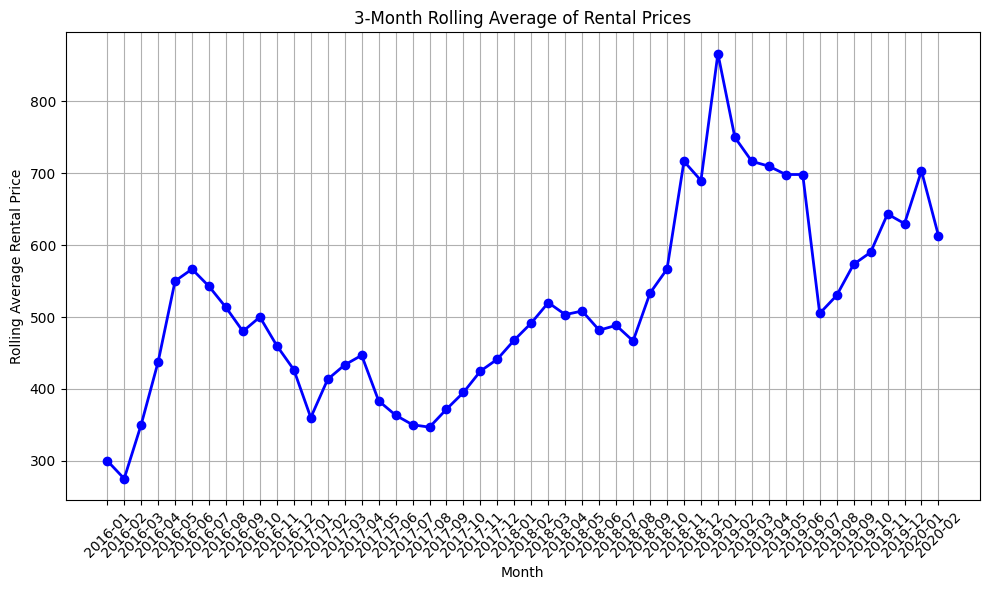

In [32]:
# Plot the data:

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_df['month'], rolling_avg_df['rolling_avg'], marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.title('3-Month Rolling Average of Rental Prices')
plt.xlabel('Month')
plt.ylabel('Rolling Average Rental Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


**Geographical distribution & defining cities of interest**

In [33]:
query2 = '''
SELECT
    city,
    COUNT(*) AS number_of_listings,
    AVG(price) AS avg_price,
    AVG(price) OVER (PARTITION BY city) AS avg_price_per_city
FROM listings
GROUP BY city
ORDER BY number_of_listings DESC;

 '''



In [34]:
# Run the query and fetch results
geo_dist_df = pd.read_sql_query(query2, conn)

# Display the results
geo_dist_df.head(20)

,city,number_of_listings,avg_price,avg_price_per_city
0,Milan,1151,1029.528427,3200.0
1,Florence,904,1043.030487,650.0
2,Pisa,522,359.302682,245.0
3,Turin,424,487.606132,450.0
4,Rome,311,838.747524,550.0
5,Bologna,280,493.319643,500.0
6,Trento,95,358.347368,350.0
7,Padova,77,403.363636,480.0
8,Siena,77,554.948052,480.0
9,Brescia,55,434.181818,475.0


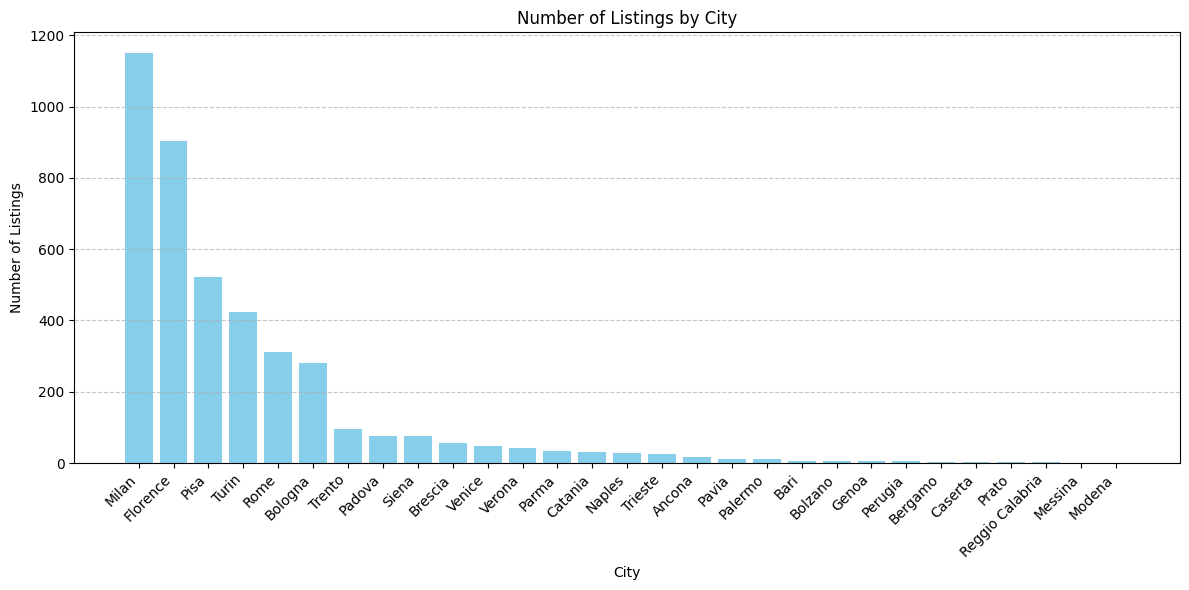

In [35]:
# Assuming geo_dist_df is your DataFrame with 'number_of_listings' and 'city' columns:

# Sort the data by 'number_of_listings' to make the bar chart more readable (optional)
geo_dist_df_sorted = geo_dist_df.sort_values('number_of_listings', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(geo_dist_df_sorted['city'], geo_dist_df_sorted['number_of_listings'], color='skyblue')

# Add labels and title
plt.title('Number of Listings by City')
plt.xlabel('City')
plt.ylabel('Number of Listings')

# Rotate x-axis labels if there are many cities for readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability (optional)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


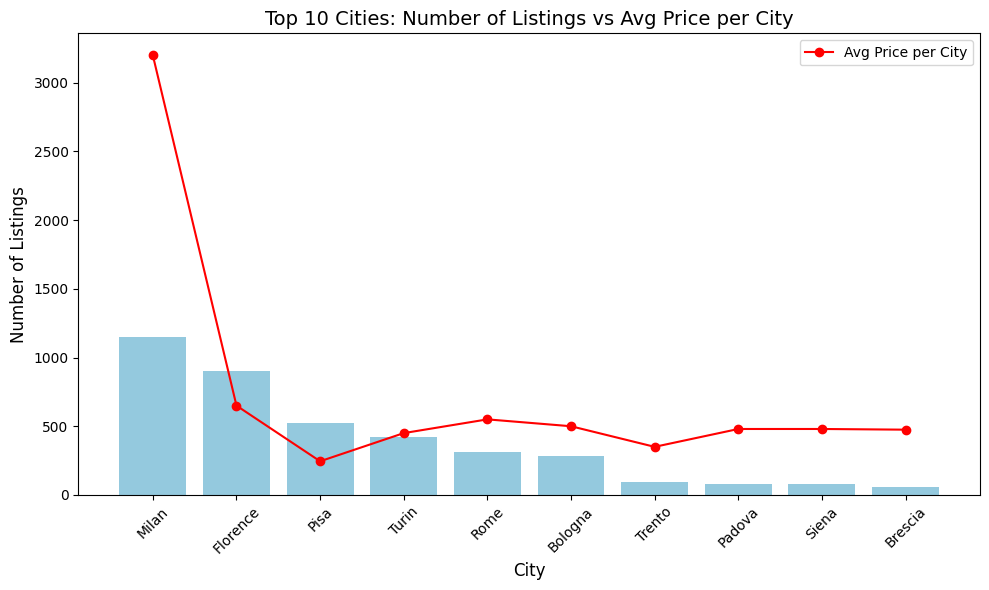

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'number_of_listings' and select the top 10 cities
top_10_df = geo_dist_df.sort_values(by='number_of_listings', ascending=False).head(10)

# Set up the plot
plt.figure(figsize=(10, 6))

# Bar chart for number_of_listings vs city (Top 10)
sns.barplot(x='city', y='number_of_listings', data=top_10_df, color='skyblue')

# Line plot for avg_price_per_city (Top 10)
plt.plot(top_10_df['city'], top_10_df['avg_price_per_city'], color='red', marker='o', label='Avg Price per City')

# Customize plot labels and title
plt.title('Top 10 Cities: Number of Listings vs Avg Price per City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Brief insights - Milan**

In [37]:
query3 = '''
SELECT *
FROM listings
where city='Milan'

 '''

 # Run the query and fetch results
milan_df = pd.read_sql_query(query3, conn)

# Display the results
milan_df.head(5)


,city,category,country_code,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
0,Milan,Apartment,it,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,Unknown,no,Unknown
1,Milan,Shared Room,it,2019-10-07 10:08:21,660.0,yes,180.0,Unknown,yes,Unknown,Unknown,Unknown,Unknown
2,Milan,Apartment,it,2018-11-21 16:15:56,6000.0,yes,180.0,yes,yes,yes,Unknown,private,Unknown
3,Milan,Private Room,it,2016-05-03 12:01:07,609.0,yes,100.0,yes,yes,yes,Unknown,no,Unknown
4,Milan,Studio,it,2017-06-20 13:34:05,900.0,no,25.0,yes,yes,yes,Unknown,no,Unknown


<ipython-input-38-cf5be3d4da18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=milan_df[milan_df['category'] != 'Unknown'], x='category', y='price', palette='Set2')


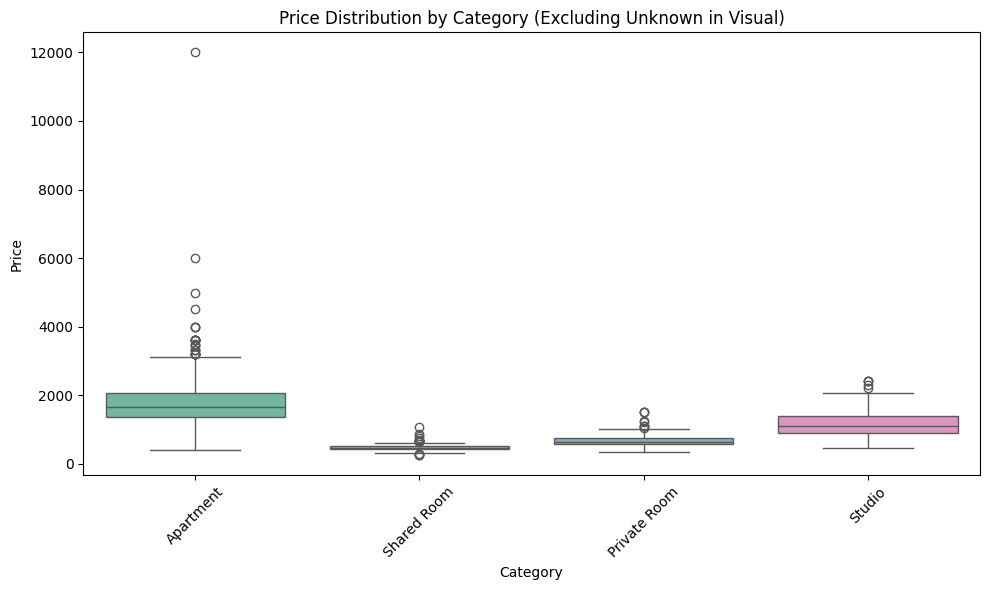

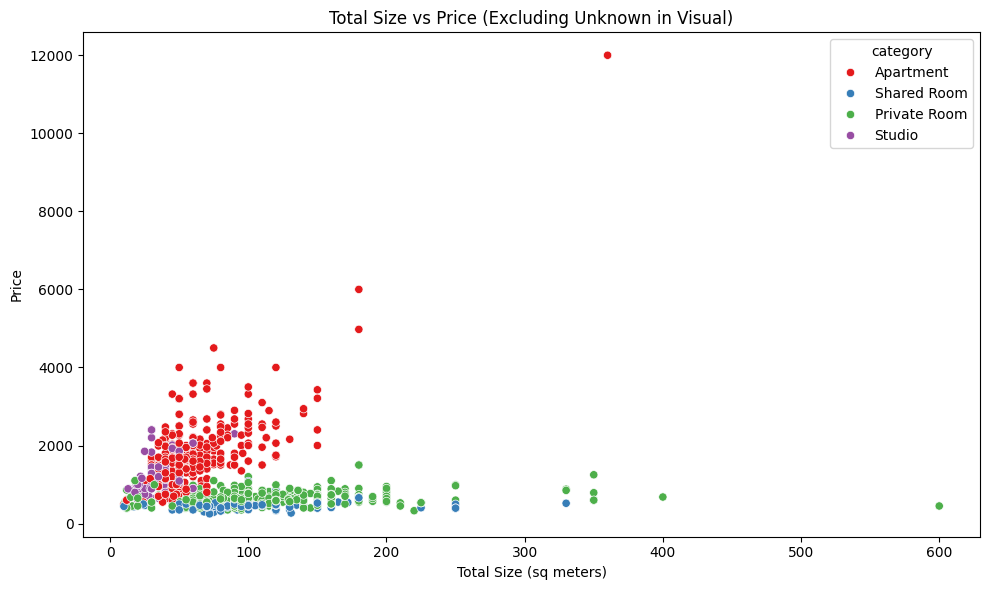

<ipython-input-38-cf5be3d4da18>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=milan_df[milan_df['furnished'] != 'Unknown'], x='furnished', y='price', palette='Set3')


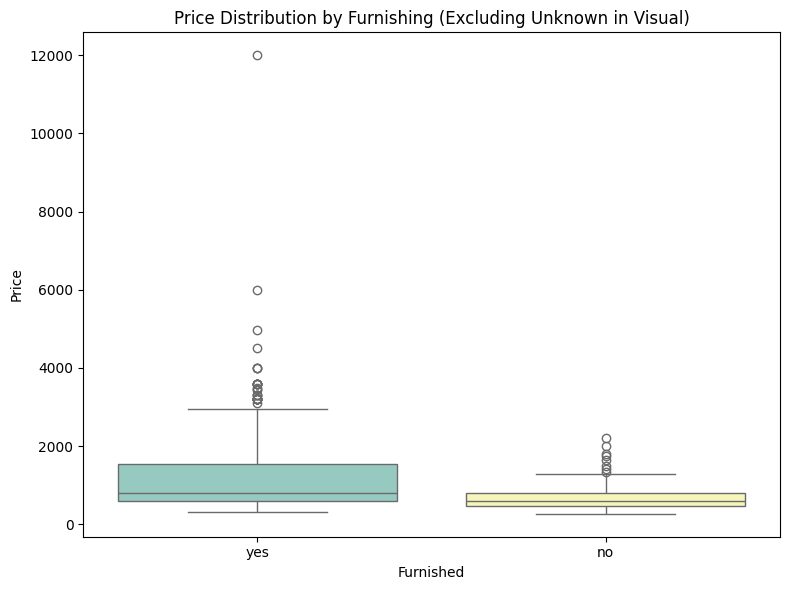

<ipython-input-38-cf5be3d4da18>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=milan_df[milan_df[feature] != 'Unknown'], x=feature, y='price', palette='Set1')


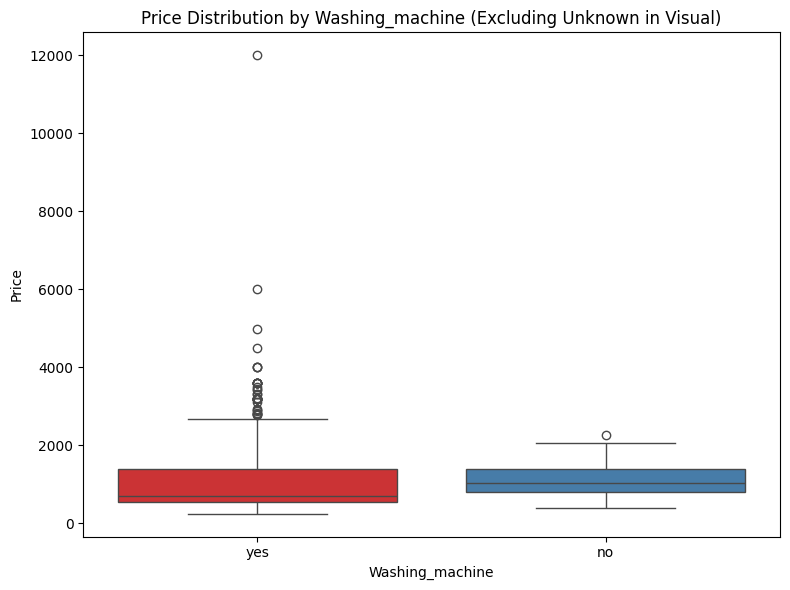

<ipython-input-38-cf5be3d4da18>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=milan_df[milan_df[feature] != 'Unknown'], x=feature, y='price', palette='Set1')


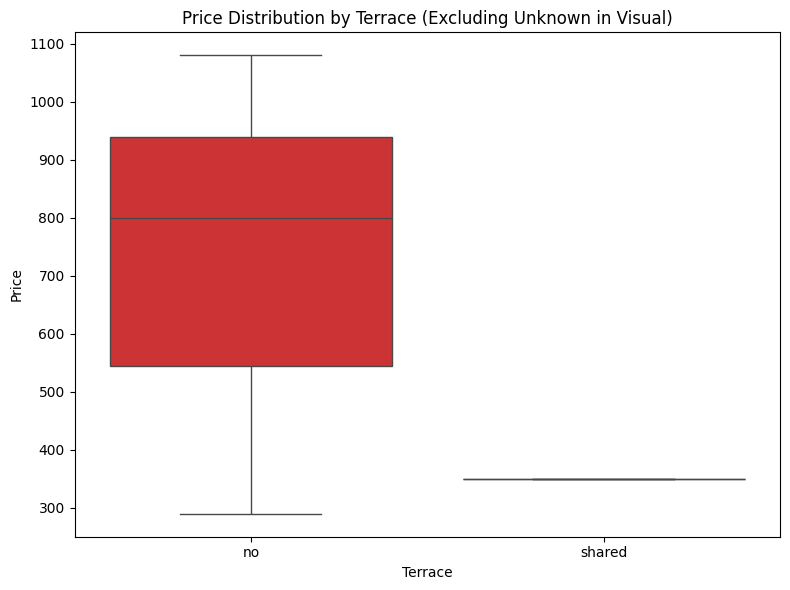

<ipython-input-38-cf5be3d4da18>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=milan_df[milan_df[feature] != 'Unknown'], x=feature, y='price', palette='Set1')


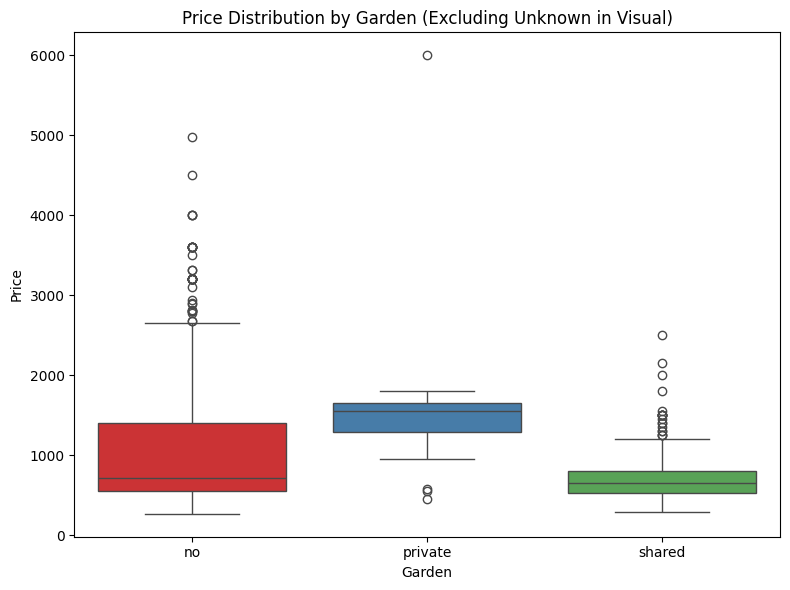

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Price by Category (excluding 'Unknown' only in the visual)
plt.figure(figsize=(10, 6))
sns.boxplot(data=milan_df[milan_df['category'] != 'Unknown'], x='category', y='price', palette='Set2')
plt.title('Price Distribution by Category (Excluding Unknown in Visual)')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Size vs. Price (excluding 'Unknown' in the visual)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=milan_df[milan_df['category'] != 'Unknown'], x='total_size', y='price', hue='category', palette='Set1')
plt.title('Total Size vs Price (Excluding Unknown in Visual)')
plt.xlabel('Total Size (sq meters)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 3. Furnishing vs. Price (excluding 'Unknown' in the visual)
plt.figure(figsize=(8, 6))
sns.boxplot(data=milan_df[milan_df['furnished'] != 'Unknown'], x='furnished', y='price', palette='Set3')
plt.title('Price Distribution by Furnishing (Excluding Unknown in Visual)')
plt.xlabel('Furnished')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 4. Features vs. Price (excluding 'Unknown' in the visual)
features = ['washing_machine', 'terrace', 'garden']

# Loop through the features to plot the impact of each on price
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=milan_df[milan_df[feature] != 'Unknown'], x=feature, y='price', palette='Set1')
    plt.title(f'Price Distribution by {feature.capitalize()} (Excluding Unknown in Visual)')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()
